## Young people survey
### 사용 데이터
- [Young People Survey](https://www.kaggle.com/datasets/miroslavsabo/young-people-survey)
- Data Description
  - Music preferences (19 items)
  - Movie preferences (12 items)
  - Hobbies & interests (32 items)
  - Phobias (10 items)
  - Health habits (3 items)
  - Personality traits, views on life, & opinions (57 items)
  - Spending habits (7 items)
  - Demographics (10 items)

In [2]:
music = 19
movie = 12
hobbies_interests = 32
phobias = 10
health_habits = 3
personality_traits = 57
spending_habits = 7
demographics = 10

대중 연설(발표)에 두려움이 있는 사람에 대해서 알아보고자 한다.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# plt.style.available
plt.style.use('default')

data = pd.read_csv("./responses.csv")
df = data.copy()
print(df.shape)

(1010, 150)


In [4]:
df_columns = pd.read_csv("./columns.csv")
print(df_columns.shape)

(150, 2)


In [5]:
to_drop_columns = list(df_columns[:music+movie].short)

In [6]:
young = df.drop(to_drop_columns, axis=1)
print(young.columns)
print(young.shape)

Index(['History', 'Psychology', 'Politics', 'Mathematics', 'Physics',
       'Internet', 'PC', 'Economy Management', 'Biology', 'Chemistry',
       ...
       'Age', 'Height', 'Weight', 'Number of siblings', 'Gender',
       'Left - right handed', 'Education', 'Only child', 'Village - town',
       'House - block of flats'],
      dtype='object', length=119)
(1010, 119)


In [7]:
young.isnull().sum()

History                   2
Psychology                5
Politics                  1
Mathematics               3
Physics                   3
                         ..
Left - right handed       3
Education                 1
Only child                2
Village - town            4
House - block of flats    4
Length: 119, dtype: int64

<AxesSubplot:>

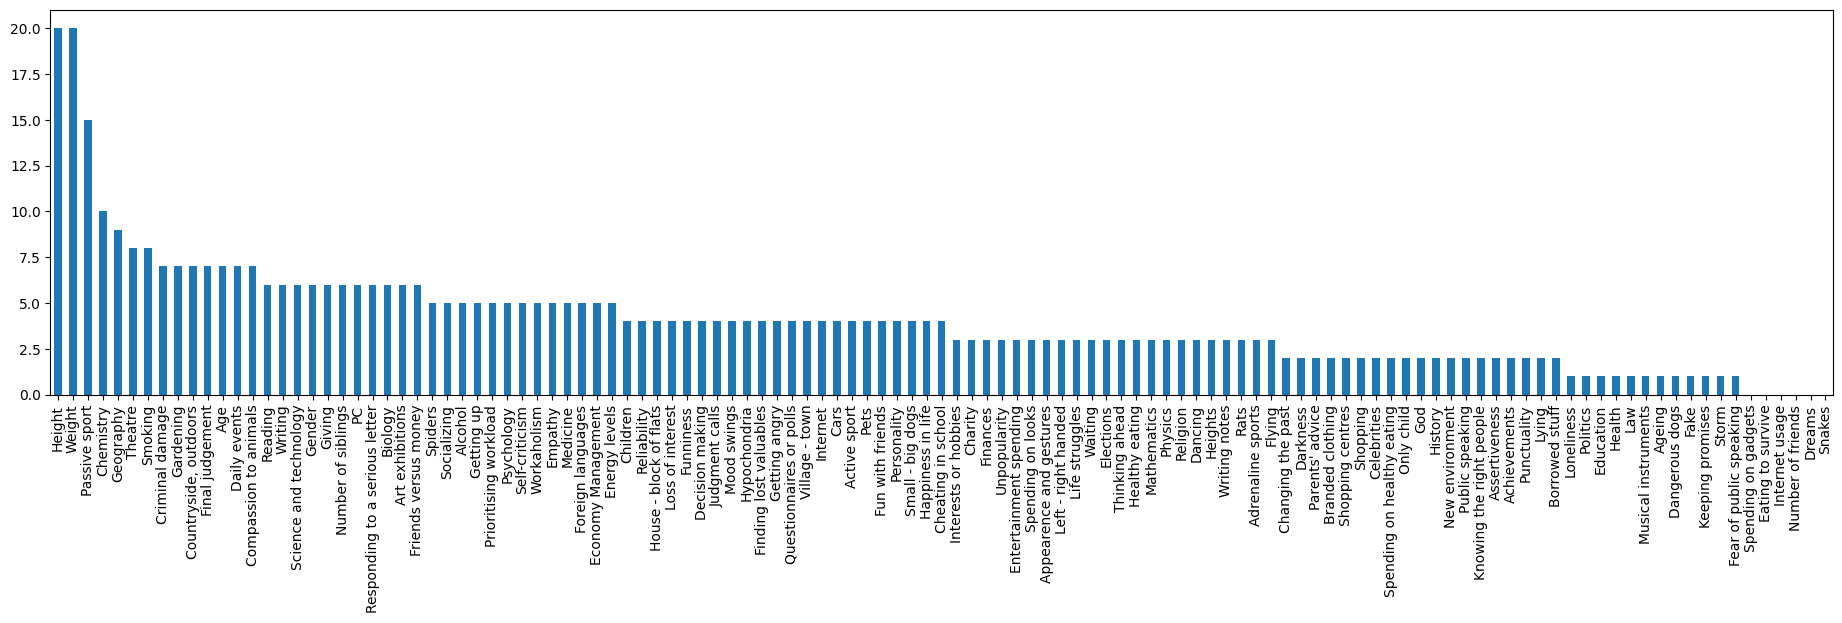

In [8]:
nulls = young.isnull().sum().sort_values(ascending=False)
nulls.plot(kind='bar', figsize=(23, 5))

In [9]:
young.drop(['Height','Weight','Only child','House - block of flats','Smoking','Alcohol','Healthy eating'], axis=1, inplace=True)

In [10]:
young = young.dropna()
young.isnull().sum()

History                0
Psychology             0
Politics               0
Mathematics            0
Physics                0
                      ..
Number of siblings     0
Gender                 0
Left - right handed    0
Education              0
Village - town         0
Length: 112, dtype: int64

In [11]:
young.duplicated().sum()

0

<AxesSubplot:xlabel='Fear of public speaking', ylabel='count'>

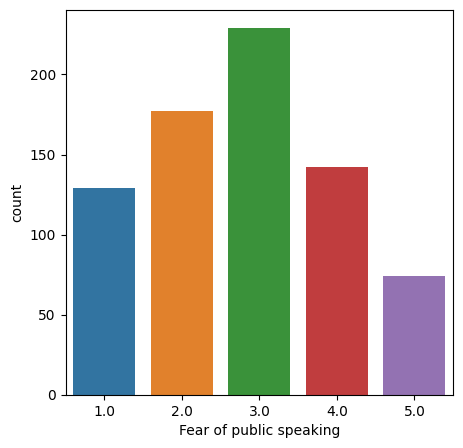

In [12]:
# Fear of public speaking
fig, ax = plt.subplots(figsize = (5,5))
sns.countplot(x='Fear of public speaking', data=young, ax=ax)

In [97]:
import scipy.stats as stats
interest_lst = list(df_columns[music+movie:music+movie+hobbies_interests].short)
corr_lst = young[interest_lst].apply(lambda x: stats.pearsonr(x, young['Fear of public speaking']), axis=0)

for k in range(corr_lst.shape[1]):
  if corr_lst.iloc[:,k][1] < 0.05:
    print(f'{interest_lst[k]} ({corr_lst.iloc[:,k][0]}, {corr_lst.iloc[:,k][1]})')


History (-0.09820996125280754, 0.0070724465568794415)
Politics (-0.19179709946770676, 1.1799551168539327e-07)
Economy Management (-0.08054798865467364, 0.027294632658467554)
Biology (0.0758396271183046, 0.03772141550864576)
Law (-0.21868171755487736, 1.3928399011470463e-09)
Cars (-0.09026632484319953, 0.013337594351406688)
Dancing (-0.10248529476733038, 0.00493458889500674)
Musical instruments (-0.08654241965549764, 0.017685262782591377)
Active sport (-0.1476187959868808, 4.8877427703150206e-05)
Science and technology (-0.07213482628156768, 0.04814434369297387)
Fun with friends (-0.10287403245920912, 0.004772616870004107)
Adrenaline sports (-0.10547404399692864, 0.0038071822009689256)


In [14]:
from_val = music+movie+hobbies_interests+phobias+health_habits
to_val = from_val + personality_traits
interest_lst = list(df_columns[from_val:to_val].short)

# young[interest_lst].dtypes
temp = young[interest_lst].copy()
deleted_lst = interest_lst.copy()
for i in range(personality_traits):
  if temp[interest_lst[i]].dtype == 'object':
    temp.drop([interest_lst[i]], axis=1, inplace=True)
    deleted_lst.remove(interest_lst[i])

print(temp.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 751 entries, 0 to 1009
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Daily events                    751 non-null    float64
 1   Prioritising workload           751 non-null    float64
 2   Writing notes                   751 non-null    float64
 3   Workaholism                     751 non-null    float64
 4   Thinking ahead                  751 non-null    float64
 5   Final judgement                 751 non-null    float64
 6   Reliability                     751 non-null    float64
 7   Keeping promises                751 non-null    float64
 8   Loss of interest                751 non-null    float64
 9   Friends versus money            751 non-null    float64
 10  Funniness                       751 non-null    float64
 11  Fake                            751 non-null    float64
 12  Criminal damage                 751

In [90]:
corr_lst = temp.apply(lambda x: stats.pearsonr(x, young['Fear of public speaking']), axis=0)

short_name = []
for k in range(corr_lst.shape[1]):
  if corr_lst.iloc[:,k][1] < 0.05 and abs(corr_lst.iloc[:,k][0]) >= 0.1:
    print(f'{deleted_lst[k]} ({corr_lst.iloc[:,k][0]}, {corr_lst.iloc[:,k][1]})')
    short_name.append(deleted_lst[k]) 

Daily events (-0.1242141989357762, 0.0006459146735672634)
Fake (0.11990213684592475, 0.0009938765045610501)
Decision making (0.1536956277812188, 2.3361283652184984e-05)
Judgment calls (-0.12623202403094383, 0.000525465965437615)
Hypochondria (0.1293581307736146, 0.0003793946778564125)
Loneliness (0.21631596051901655, 2.1089989405845647e-09)
Health (0.12334294207956353, 0.0007054578344122788)
Changing the past (0.19471773071863116, 7.498579487722308e-08)
Number of friends (-0.295996821106026, 1.1866143962136627e-16)
Waiting (-0.1123574408366987, 0.0020442538589860904)
New environment (-0.29197867710528386, 3.16727123230883e-16)
Mood swings (0.14220810609424922, 9.209602522848459e-05)
Appearence and gestures (-0.10356060424299063, 0.004498237733574423)
Socializing (-0.3016481369176932, 2.904918841873269e-17)
Assertiveness (-0.22803512452222424, 2.578111354610591e-10)
Knowing the right people (-0.1692682377754985, 3.0912138582390312e-06)
Public speaking (0.5149564822863961, 4.324428790376

In [16]:
from_val = music + movie + hobbies_interests + phobias+health_habits + personality_traits
to_val = from_val + spending_habits
interest_lst = list(df_columns[from_val:to_val].short)

corr_lst = []
for i in range(spending_habits):
  corr_lst.append(stats.pearsonr(young[interest_lst][interest_lst[i]], young['Fear of public speaking']))

for k in range(len(corr_lst)):
  if corr_lst[k][1] < 0.05:
    print(interest_lst[k], corr_lst[k])

Finances (0.0730273446601227, 0.04543473175533622)
Branded clothing (-0.09332439622041772, 0.010502708541634074)
Entertainment spending (-0.1249955741584307, 0.0005965164622100341)
Spending on looks (-0.10674098318641576, 0.0034041701755211295)


가외변인(제3의 변인, 통제 변인)을 생각하지 않고 단순 상관관계를 구했을 때,
Phobias의 'Fear of public speaking' 요인은 Personality traits, views on life, & opinions 의 항목들과
상관이 좀 더 있는 것으로 보인다.

In [17]:
short_name

['Daily events',
 'Fake',
 'Decision making',
 'Judgment calls',
 'Hypochondria',
 'Loneliness',
 'Health',
 'Changing the past',
 'Number of friends',
 'Waiting',
 'New environment',
 'Mood swings',
 'Appearence and gestures',
 'Socializing',
 'Assertiveness',
 'Knowing the right people',
 'Public speaking',
 'Happiness in life',
 'Energy levels',
 'Personality',
 'Interests or hobbies']

In [18]:
print(df_columns.columns)
# df_columns.rename(columns={df_columns.columns[0]:df_columns.columns[0].replace(" ","")}, inplace=True)
df_columns.rename(columns={df_columns.columns[0]:df_columns.columns[0].strip()}, inplace=True)
print(df_columns.columns)

Index(['original                                                                        ', 'short'], dtype='object')
Index(['original', 'short'], dtype='object')


In [33]:
# df_columns.loc[df_columns['short'].isin(short_name) == True, 'original']
# 전체 문장을 보고 싶었으나, 문장이 너무 길어 확인이 되지 않는다.

interest_columns = df_columns.loc[df_columns['short'].isin(short_name) == True].reset_index(drop=True)
interest_columns

,original,short
0,I take notice of what goes on around me. ...,Daily events
1,I can be two faced sometimes. ...,Fake
2,I take my time to make decisions. ...,Decision making
3,I can tell if people listen to me or not when ...,Judgment calls
4,I am a hypochondriac. ...,Hypochondria
5,I feel lonely in life. ...,Loneliness
6,I worry about my health. ...,Health
7,I wish I could change the past because of the ...,Changing the past
8,I have lots of friends. ...,Number of friends
9,I am very patient. ...,Waiting


In [58]:
personal_trait = young[list(interest_columns['short'])].copy()
interest_columns['r'] = np.nan
interest_columns['p-value'] = np.nan

for i in range(personal_trait.shape[1]):
  corr_value = stats.pearsonr(personal_trait[short_name[i]], young['Fear of public speaking'])
  interest_columns['r'][i] = corr_value[0]
  interest_columns['p-value'][i]  = corr_value[1]

C:\Users\12yoo\AppData\Local\Temp\ipykernel_20900\237588327.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interest_columns['r'][i] = corr_value[0]
C:\Users\12yoo\AppData\Local\Temp\ipykernel_20900\237588327.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interest_columns['p-value'][i]  = corr_value[1]


In [98]:
interest_columns.sort_values(by='r', ascending=False)

,original,short,r,p-value
16,I have to be well prepared before public speak...,Public speaking,0.514956,4.324429e-52
5,I feel lonely in life. ...,Loneliness,0.216316,2.108999e-09
7,I wish I could change the past because of the ...,Changing the past,0.194718,7.498579e-08
2,I take my time to make decisions. ...,Decision making,0.153696,2.336128e-05
11,My moods change quickly. ...,Mood swings,0.142208,9.209603e-05
4,I am a hypochondriac. ...,Hypochondria,0.129358,3.793947e-04
6,I worry about my health. ...,Health,0.123343,7.054578e-04
1,I can be two faced sometimes. ...,Fake,0.119902,9.938765e-04
12,I am well mannered and I look after my appeara...,Appearence and gestures,-0.103561,4.498238e-03
9,I am very patient. ...,Waiting,-0.112357,2.044254e-03


personal trait 내에서의 상관관계는 어떻게 될까?

C:\Users\12yoo\AppData\Local\Temp\ipykernel_20900\1499306339.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(temp_corr, dtype=np.bool)


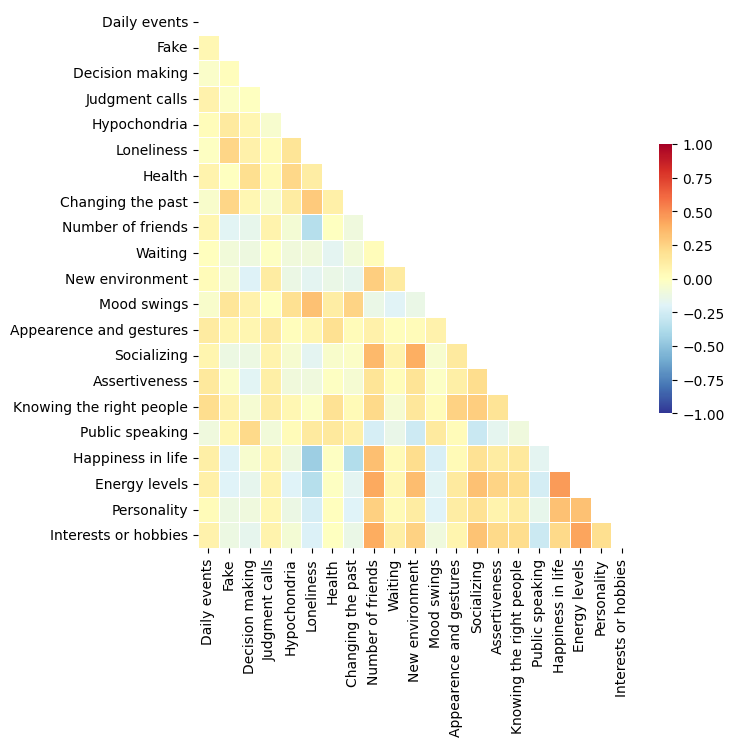

In [120]:
temp_corr = personal_trait.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(7,7) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(temp_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(temp_corr, 
            cmap = 'RdYlBu_r', # Red, Yellow, Blue
            annot = False,   # 실제 값을 표시하지 않는다.
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5}, # 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

# temp_corr['Public speaking']
# temp_corr['Public speaking'].loc['Decision making']

1. 발표의 어려움이 있는 사람은 외로움을 느끼거나 사회화에 어려움을 겪는 경향이 있을 가능성이 있다.
2. 또한, 이러한 특징들이 높은 사람은 새로운 환경에 적응하는 것에도 어려움이 있는 것으로 보인다.
3. 하지만 이 분석은 제 3의 변인을 고려하지 않았으므로 해석에 특히 더 주의해야 한다.